In [1]:
# CELL 1: Imports and base path (NO ERRORS)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

BASE_PATH = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Google Play Store Analysis"

print("Base path exists:", os.path.exists(BASE_PATH))
print("Files in folder:", os.listdir(BASE_PATH))


Base path exists: True
Files in folder: ['.ipynb_checkpoints', '01_google_playstore_eda.ipynb', 'Google Play Store Apps.pdf', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'outputs']


In [2]:
# CELL 2: Load datasets safely

apps_path = os.path.join(BASE_PATH, "googleplaystore.csv")
reviews_path = os.path.join(BASE_PATH, "googleplaystore_user_reviews.csv")

apps = pd.read_csv(apps_path)
reviews = pd.read_csv(reviews_path)

print("Apps shape:", apps.shape)
print("Reviews shape:", reviews.shape)

apps.head()


Apps shape: (10841, 13)
Reviews shape: (64295, 5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# CELL 3: Dataset overview

print("=== APPS DATASET INFO ===")
apps.info()

print("\n=== MISSING VALUES (Apps) ===")
print(apps.isnull().sum())

print("\n=== REVIEWS DATASET INFO ===")
reviews.info()

print("\n=== MISSING VALUES (Reviews) ===")
print(reviews.isnull().sum())


=== APPS DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

=== MISSING VALUES (Apps) ===
App                  0
Category             0
Rating            1474
Reviews              0
Size          

In [4]:
# CELL 4: Clean Apps dataset

df = apps.copy()

# Reviews → numeric
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

# Installs → numeric
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Price → numeric
df["Price"] = df["Price"].str.replace("$", "", regex=False)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Size → numeric (MB)
def clean_size(x):
    if "M" in x:
        return float(x.replace("M", ""))
    elif "k" in x:
        return float(x.replace("k", "")) / 1024
    else:
        return np.nan

df["Size_MB"] = df["Size"].astype(str).apply(clean_size)

# Last Updated → datetime
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

# Drop rows with missing Rating
df = df.dropna(subset=["Rating"])

print("Cleaned dataset shape:", df.shape)
df.head()


Cleaned dataset shape: (9367, 14)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8


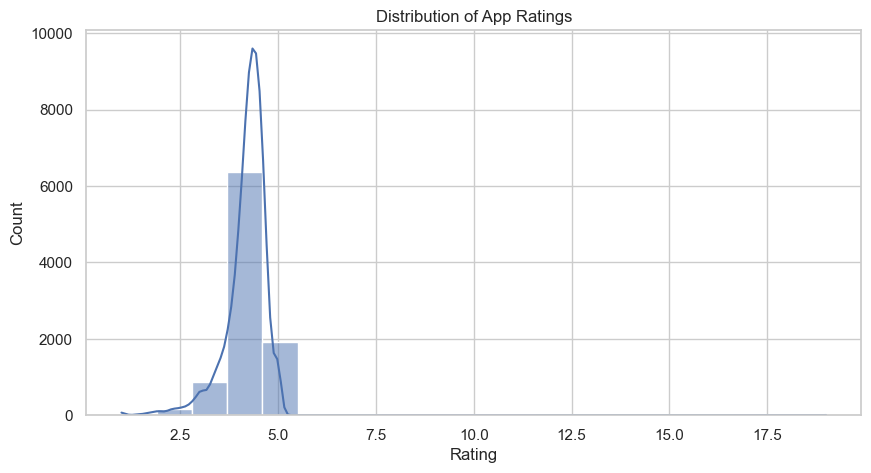

In [5]:
# CELL 5: Rating distribution

sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [6]:
# CELL 6: Average rating by category

category_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

category_rating.head(10)


Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
Name: Rating, dtype: float64

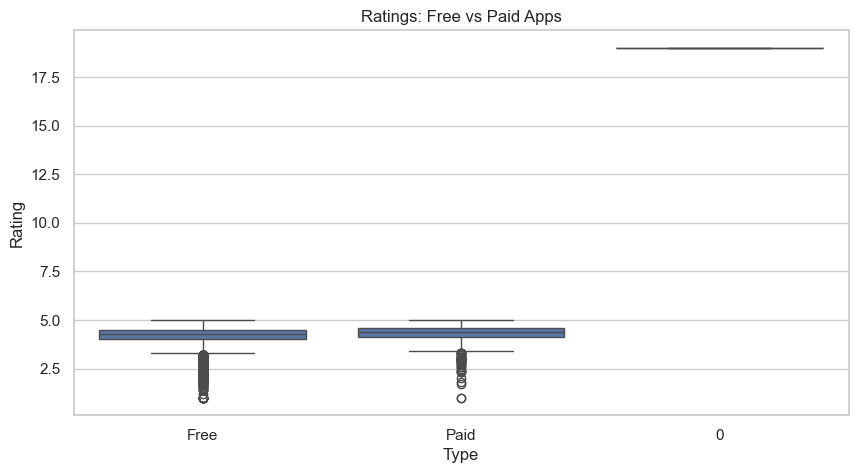

In [7]:
# CELL 7: Free vs Paid comparison

sns.boxplot(x="Type", y="Rating", data=df)
plt.title("Ratings: Free vs Paid Apps")
plt.show()


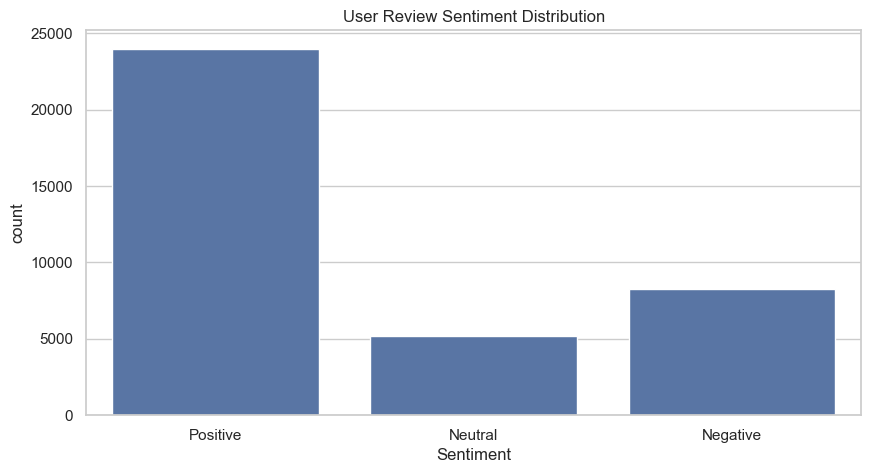

In [8]:
# CELL 8: Sentiment distribution

reviews_clean = reviews.dropna(subset=["Sentiment"])

sns.countplot(x="Sentiment", data=reviews_clean)
plt.title("User Review Sentiment Distribution")
plt.show()


In [9]:
# CELL 9: Top categories by app count

top_categories = df["Category"].value_counts().head(10)

top_categories


Category
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
PERSONALIZATION     314
Name: count, dtype: int64

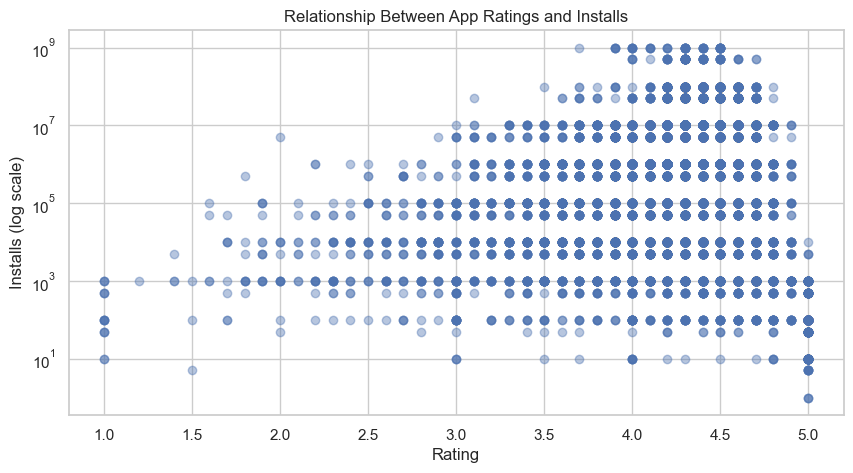

In [10]:
# CELL 10: Installs vs Rating (log scale)

plt.scatter(df["Rating"], df["Installs"], alpha=0.4)
plt.yscale("log")
plt.xlabel("Rating")
plt.ylabel("Installs (log scale)")
plt.title("Relationship Between App Ratings and Installs")
plt.show()


In [11]:
# CELL 11: Estimated revenue for paid apps

paid_apps = df[df["Type"] == "Paid"].copy()
paid_apps["Revenue"] = paid_apps["Price"] * paid_apps["Installs"]

paid_apps[["App", "Category", "Price", "Installs", "Revenue"]].sort_values(
    by="Revenue", ascending=False
).head(10)


,App,Category,Price,Installs,Revenue
4347,Minecraft,FAMILY,6.99,10000000.0,69900000.0
2241,Minecraft,FAMILY,6.99,10000000.0,69900000.0
5351,I am rich,LIFESTYLE,399.99,100000.0,39999000.0
5356,I Am Rich Premium,FINANCE,399.99,50000.0,19999500.0
4034,Hitman Sniper,GAME,0.99,10000000.0,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,6.99,1000000.0,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,5.99,1000000.0,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,5.99,1000000.0,5990000.0
2950,Facetune - For Free,PHOTOGRAPHY,5.99,1000000.0,5990000.0
2912,Facetune - For Free,PHOTOGRAPHY,5.99,1000000.0,5990000.0


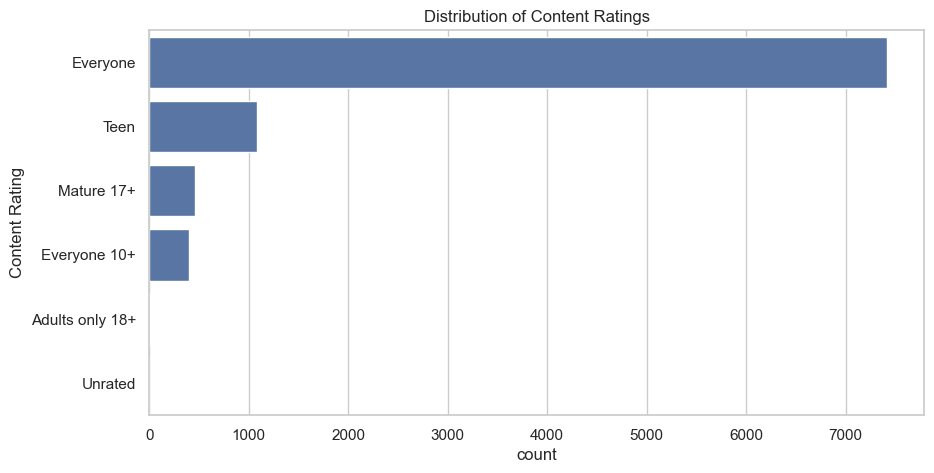

In [12]:
# CELL 12: Content rating distribution

sns.countplot(
    y="Content Rating",
    data=df,
    order=df["Content Rating"].value_counts().index
)
plt.title("Distribution of Content Ratings")
plt.show()


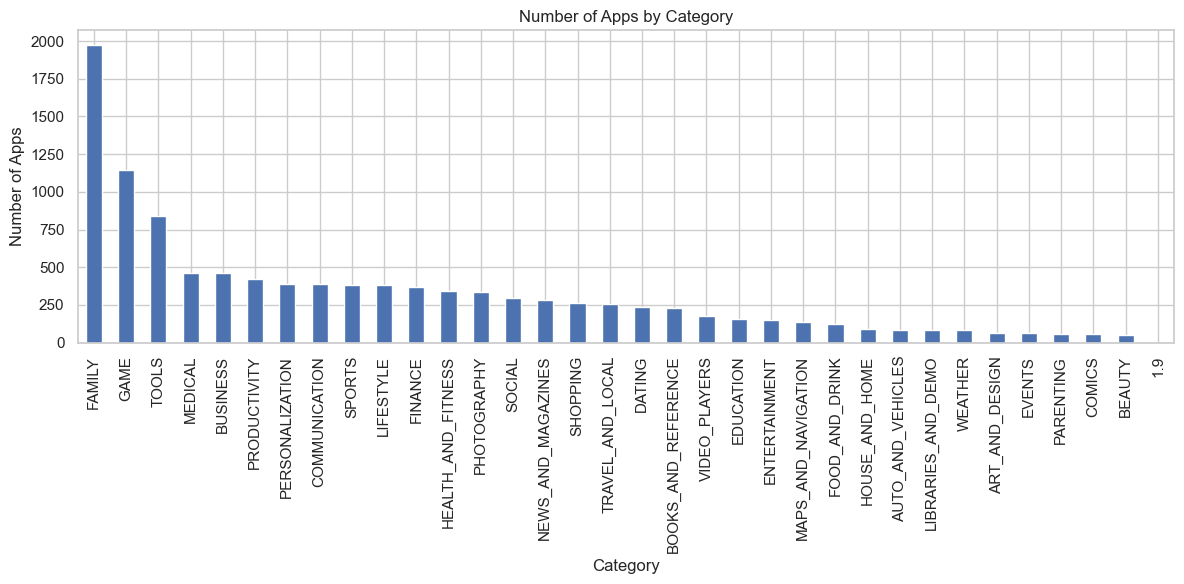

In [13]:
import matplotlib.pyplot as plt

# Count number of apps per category
category_counts = apps['Category'].value_counts()

# Plot
plt.figure(figsize=(12,6))
category_counts.plot(kind='bar')

plt.title("Number of Apps by Category")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.tight_layout()
plt.show()
